In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.20


In [3]:
from lmfit import *

In [4]:
data=pd.read_csv('Dose-Response Data (1).csv')
data

,Dose [mg],Percent Pain Free,Upper Percent Pain Free,Lower Percent Pain Free
0,0.0,9.529412,6.588235,3.882353
1,2.5,12.235294,16.823529,8.352941
2,5.0,11.058824,13.294118,7.176471
3,10.0,25.294118,12.588235,10.117647
4,20.0,18.941176,11.882353,8.941176
5,50.0,21.411765,12.235294,9.176471
6,100.0,23.411765,13.176471,9.647059
7,200.0,36.117647,13.764706,11.647059


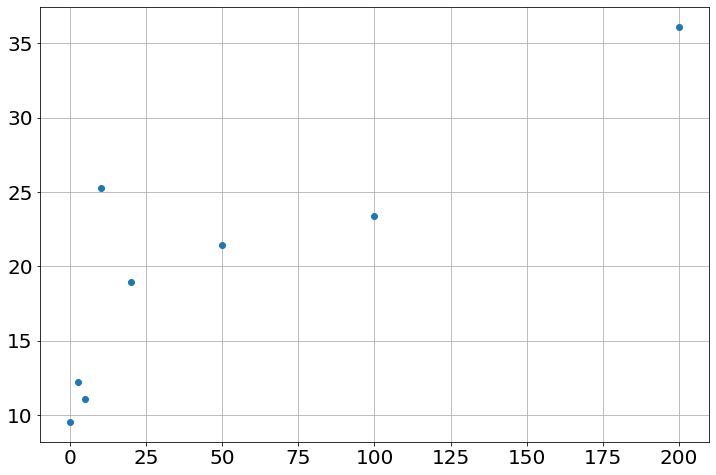

In [5]:
t_data=data["Dose [mg]"]
y_data=data["Percent Pain Free"]
plot(t_data,y_data,'o')

In [6]:
t_data,y_data

(0      0.0
 1      2.5
 2      5.0
 3     10.0
 4     20.0
 5     50.0
 6    100.0
 7    200.0
 Name: Dose [mg], dtype: float64,
 0     9.529412
 1    12.235294
 2    11.058824
 3    25.294118
 4    18.941176
 5    21.411765
 6    23.411765
 7    36.117647
 Name: Percent Pain Free, dtype: float64)

In [7]:
def dose(D,Eo,Em,ED):
    
    return Eo+((D*Em)/(D+ED))



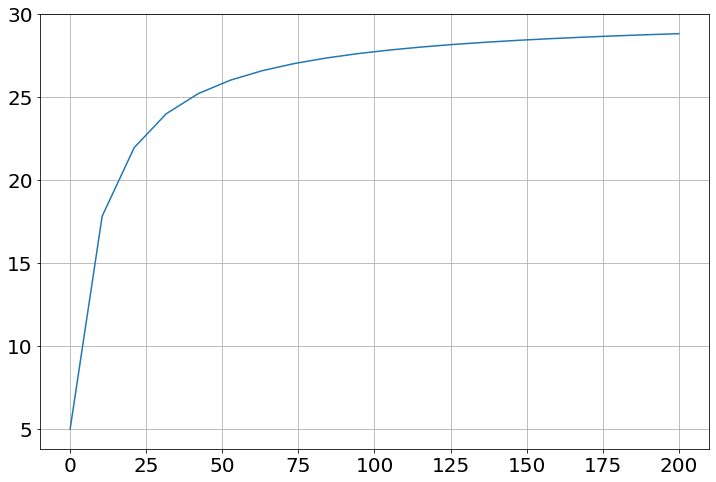

In [8]:
x=linspace(0,200,20)
y=dose(x,5,25,10)
plot(x,y)

In [9]:
qmodel=Model(dose)   

In [10]:
qmodel.param_names

['Eo', 'Em', 'ED']

In [11]:
params=qmodel.make_params()
params

name,value,initial value,min,max,vary
Eo,-inf,None,-inf,inf,True
Em,-inf,None,-inf,inf,True
ED,-inf,None,-inf,inf,True


In [12]:
params['Eo']=Parameter("Eo",min=3,max=6,value=5)
params['Em']=Parameter("Em",min=0,max=30,value=25)
params['ED']=Parameter("ED",min=6,max=60,value=10)

In [13]:
result = qmodel.fit(y_data, params, D=t_data,method="powell")

In [27]:
def constant(x,a):
    return a*ones(x.shape)

In [28]:
qmodel=Model(constant)   

In [29]:
params=qmodel.make_params()
params

name,value,initial value,min,max,vary
a,-inf,None,-inf,inf,True


In [30]:
params['a']=Parameter("a",min=0,value=5)

In [31]:
result = qmodel.fit(y_data, params, x=t_data,method="powell")

In [32]:
result

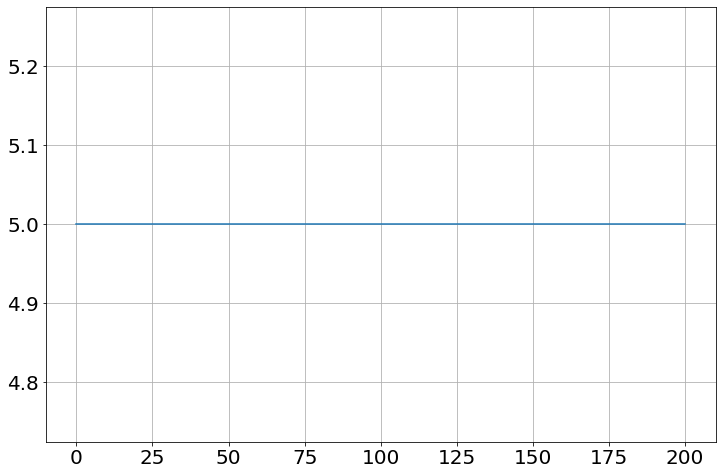

In [33]:
x=linspace(0,200,20)
y=constant(x,5)
plot(x,y)